In [1]:
from torch_geometric.loader import DataLoader
from collections import OrderedDict
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

/homes/dlupo/.local/lib/python3.9/site-packages/torch/__config__.py:10: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._show_config()


In [2]:
FILE_PATH = "/homes/dlupo/Progetto_BioInformatics/AI_for_Bioinformatics_Project/Models_GitHub_davide/run_output/output.log"

In [ ]:
with open(FILE_PATH, 'r') as file:
    string_file = file.read()

for dataset in string_file.split('Target dataset: GENE_EXP_')[1:]:
    num_node, t = dataset.split('\n')[0].split('_')
    print("\t\t---------------------------------------------------")
    print(f"\t\t    Dataset with {num_node} nodes and Threashold 0.{t}")
    print("\t\t---------------------------------------------------")
    train_loss = {}
    test_loss = {}
    test_acc = {}
    for fold in dataset.split('FOLD ')[1:]:
        fold_number = int(fold.split('\n')[0])
        train_loss[fold_number] = []
        test_loss[fold_number] = []
        test_acc[fold_number] = []

        epochs = fold.split("\n\n")

        epochs[0] = "\n".join(epochs[0].split("\n")[4:])
        epochs = epochs[:-2]

        for epoch in epochs:
            lines = epoch.split("\n")
            
            train_loss[fold_number].append(float(lines[1].split("Loss: ")[1].split(' ')[0]))
            test_loss[fold_number].append(float(lines[-1].split("Average loss: ")[1].split(',')[0]))
            test_acc[fold_number].append(float(lines[-1].split('(')[2].split('%')[0]))

            # print(float(lines[1].split("Loss: ")[1].split(' ')[0]))
            # print(float(lines[-1].split("Average loss: ")[1].split(',')[0]))
            # print(float(lines[-1].split('(')[2].split('%')[0]))

        X = np.array(range(len(epochs)))
        train_loss_np = np.array(train_loss[fold_number])
        test_loss_np = np.array(test_loss[fold_number])
        test_acc_np = np.array(test_acc[fold_number])

        fig, ax1 = plt.subplots()
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Test Accuracy', color='r')
        ax1.plot(X, test_acc_np, color='r')
        ax1.tick_params(axis='y', labelcolor='r')

        ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
        ax2.set_ylabel('Loss', color='b')  # we already handled the x-label with ax1
        ax2.plot(X, train_loss_np, color='c')
        ax2.plot(X, test_loss_np, color='b')
        ax2.tick_params(axis='y', labelcolor='b')

        fig.tight_layout()  # otherwise the right y-label is slightly clipped

        # Adding legend, which helps us recognize the curve according to it's color
        plt.legend()

        # To load the display window
        plt.show()

        # print(len(epochs))
        # print("\n".join(epochs[0].split("\n")[4:]))
        # print(epochs[-5:-2])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


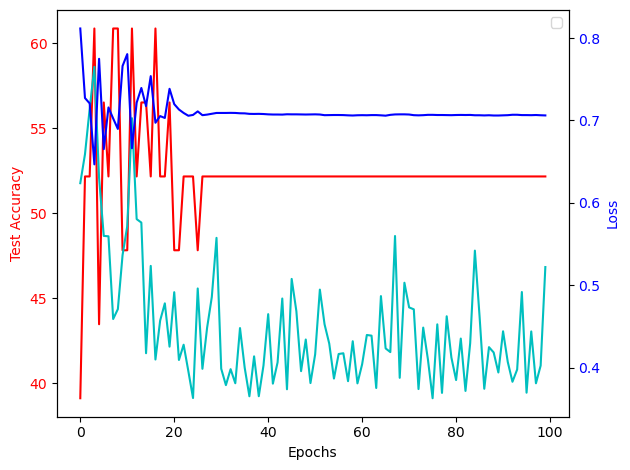

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


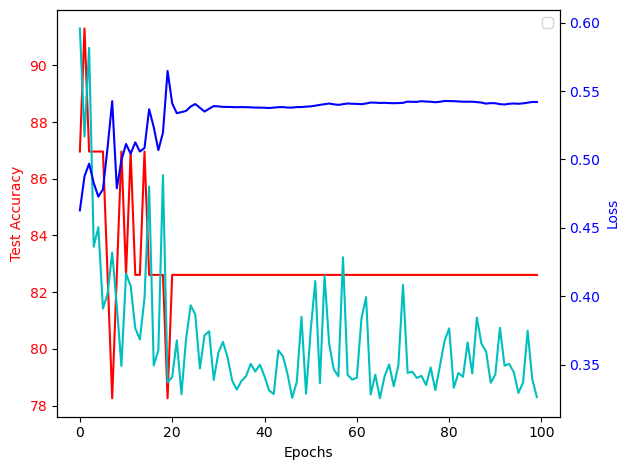

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


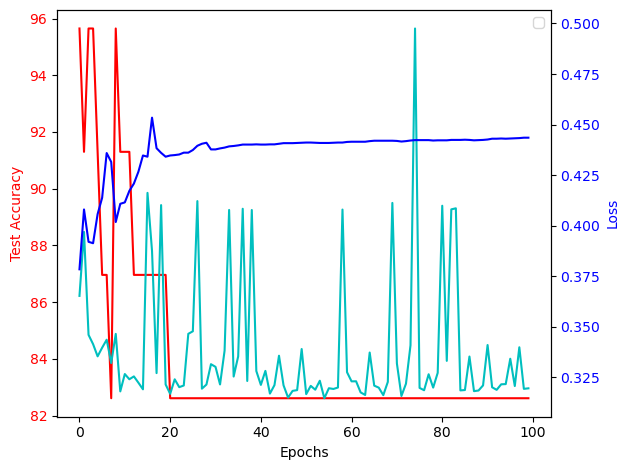

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


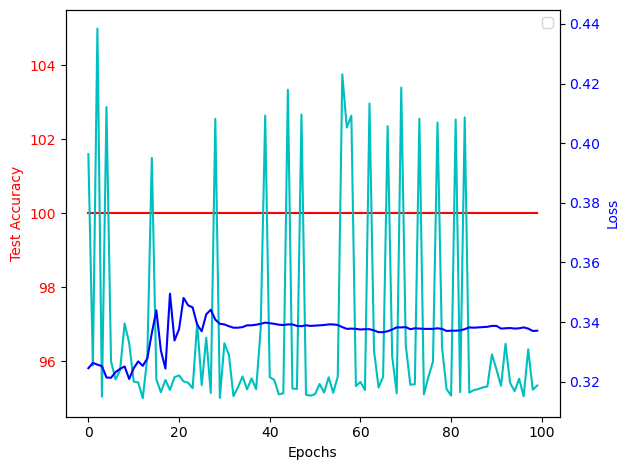

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


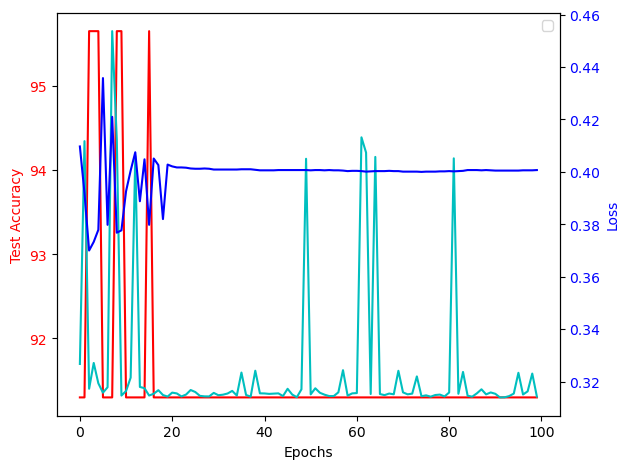

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


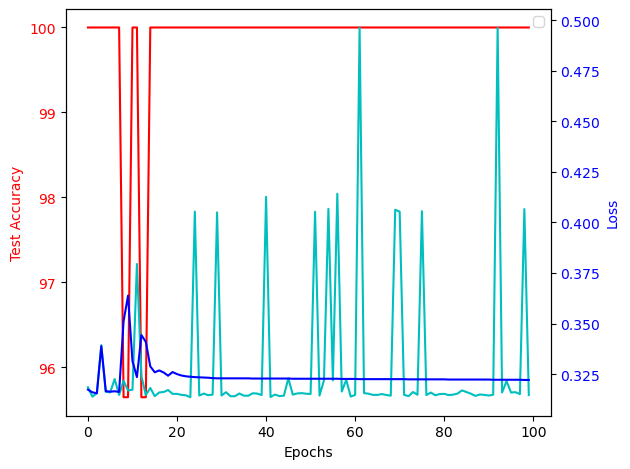

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


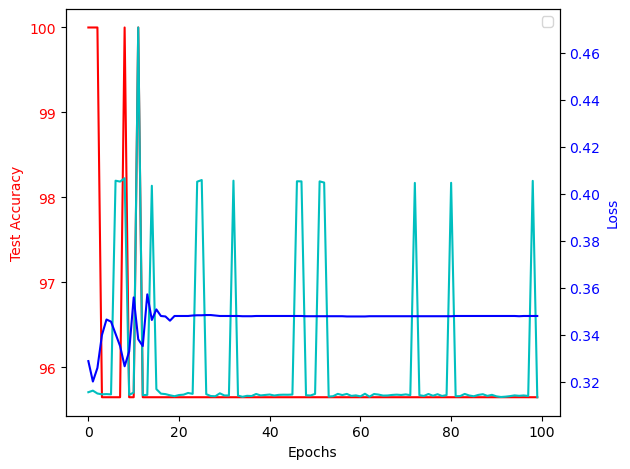

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


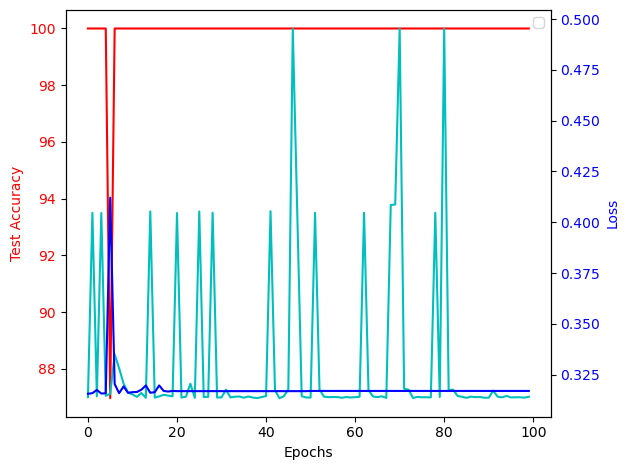

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


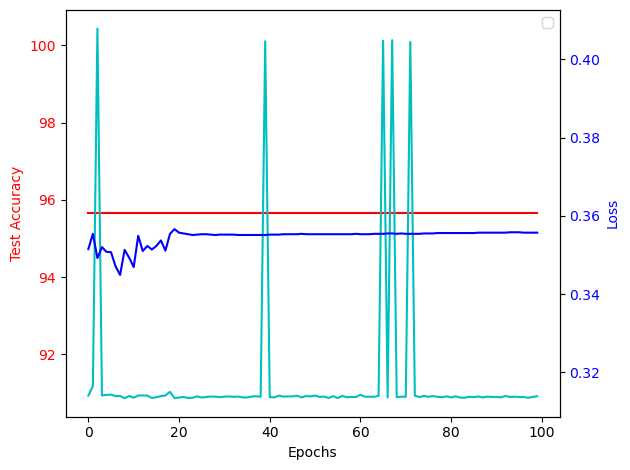

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


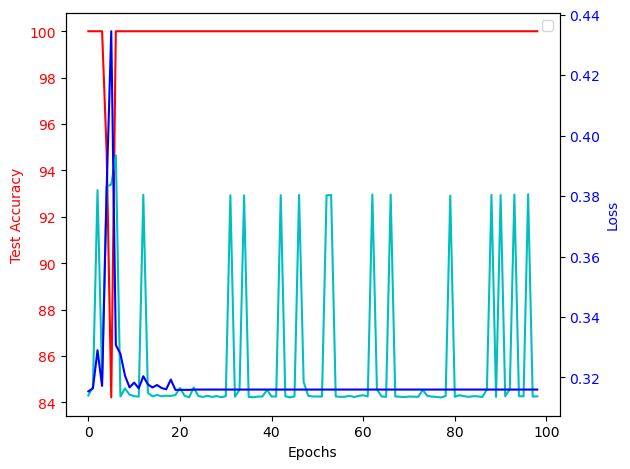

In [6]:
# Variant withput the dataset separation

with open(FILE_PATH, 'r') as file:
    string_file = file.read()

train_loss = {}
test_loss = {}
test_acc = {}

for fold in string_file.split('FOLD ')[1:]:
    fold_number = int(fold.split('\n')[0])
    train_loss[fold_number] = []
    test_loss[fold_number] = []
    test_acc[fold_number] = []

    epochs = fold.split("\n\n")

    epochs[0] = "\n".join(epochs[0].split("\n")[4:])
    epochs = epochs[:-2]

    for epoch in epochs:
        lines = epoch.split("\n")
        
        train_loss[fold_number].append(float(lines[1].split("Loss: ")[1].split(' ')[0]))
        test_loss[fold_number].append(float(lines[-1].split("Average loss: ")[1].split(',')[0]))
        test_acc[fold_number].append(float(lines[-1].split('(')[2].split('%')[0]))

        # print(float(lines[1].split("Loss: ")[1].split(' ')[0]))
        # print(float(lines[-1].split("Average loss: ")[1].split(',')[0]))
        # print(float(lines[-1].split('(')[2].split('%')[0]))

    X = np.array(range(len(epochs)))
    train_loss_np = np.array(train_loss[fold_number])
    test_loss_np = np.array(test_loss[fold_number])
    test_acc_np = np.array(test_acc[fold_number])

    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Test Accuracy', color='r')
    ax1.plot(X, test_acc_np, color='r')
    ax1.tick_params(axis='y', labelcolor='r')

    ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis
    ax2.set_ylabel('Loss', color='b')  # we already handled the x-label with ax1
    ax2.plot(X, train_loss_np, color='c')
    ax2.plot(X, test_loss_np, color='b')
    ax2.tick_params(axis='y', labelcolor='b')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend()

    # To load the display window
    plt.show()

    # print(len(epochs))
    # print("\n".join(epochs[0].split("\n")[4:]))
    # print(epochs[-5:-2])
